# 2_Portfolio Investing
## Portfolio composition and backtesting


### Calculating portfolio returns
In order to build and backtest a portfolio, you have to be comfortable working with the returns of multiple assets in a single object.

In this exercise, you will be using a pandas DataFrame object, already stored as the variable StockReturns, to hold the returns of multiple assets and to calculate the returns of a model portfolio.

In [47]:
import os
import pandas as pd


StockReturns = pd.DataFrame(pd.read_csv('https://assets.datacamp.com/production/repositories/1546/datasets/fb7165b7270a3721f69abf9ff09b85938d9d1068/Big9Returns2017.csv', parse_dates = ['Date']))\
.set_index('Date')
StockReturns

,AAPL,MSFT,XOM,JNJ,JPM,AMZN,GE,FB,T
Date,,,,,,,,,
2017-01-03,0.002849,0.007081,0.006980,0.005468,0.010894,0.005068,0.002848,0.015732,0.011521
2017-01-04,-0.001119,-0.004474,-0.011002,-0.001640,0.001844,0.004657,0.000316,0.015660,-0.005811
2017-01-05,0.005085,0.000000,-0.014907,0.010463,-0.009205,0.030732,-0.005678,0.016682,-0.002806
2017-01-06,0.011148,0.008668,-0.000565,-0.004792,0.000116,0.019912,0.002855,0.022707,-0.019924
2017-01-09,0.009159,-0.003183,-0.016497,-0.000172,0.000697,0.001168,-0.004745,0.012074,-0.012585
...,...,...,...,...,...,...,...,...,...
2017-12-22,0.000000,0.000117,0.001431,-0.006664,-0.003524,-0.005448,0.001717,-0.001409,0.001543
2017-12-26,-0.025370,-0.001286,0.000119,-0.000214,-0.004002,0.007190,0.002877,-0.006828,0.003082
2017-12-27,0.000176,0.003630,-0.000953,0.003426,0.001869,0.004674,-0.002869,0.009262,-0.004352


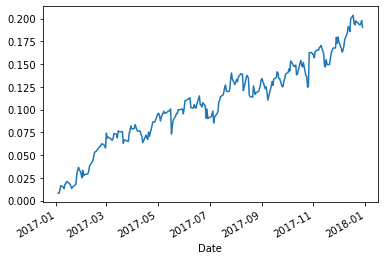

In [48]:

import numpy as np 
import matplotlib.pyplot as plt

# Finish defining the portfolio weights as a numpy array
portfolio_weights = np.array([0.12, 0.15, 0.08, 0.05, 0.09, 0.10, 0.11, 0.14, 0.16])

# Calculate the weighted stock returns
WeightedReturns = StockReturns.mul(portfolio_weights, axis=1)

# Calculate the portfolio returns
StockReturns['Portfolio'] = WeightedReturns.sum(axis=1)

# Plot the cumulative portfolio returns over time
CumulativeReturns = ((1+StockReturns["Portfolio"]).cumprod()-1)
CumulativeReturns.plot()
plt.show()

### Equal weighted portfolios
When comparing different portfolios, you often want to consider performance versus a naive equally-weighted portfolio. If the portfolio doesn't outperform a simple equally weighted portfolio, you might want to consider another strategy, or simply opt for the naive approach if all else fails. You can expect equally-weighted portfolios to tend to outperform the market when the largest companies are doing poorly. This is because even tiny companies would have the same weight in your equally-weighted portfolio as Apple or Amazon, for example.

To make it easier for you to visualize the cumulative returns of portfolios, we defined the function cumulative_returns_plot() in your workspace.

In [49]:
StockReturns

,AAPL,MSFT,XOM,JNJ,JPM,AMZN,GE,FB,T,Portfolio
Date,,,,,,,,,,
2017-01-03,0.002849,0.007081,0.006980,0.005468,0.010894,0.005068,0.002848,0.015732,0.011521,0.008082
2017-01-04,-0.001119,-0.004474,-0.011002,-0.001640,0.001844,0.004657,0.000316,0.015660,-0.005811,0.000161
2017-01-05,0.005085,0.000000,-0.014907,0.010463,-0.009205,0.030732,-0.005678,0.016682,-0.002806,0.003448
2017-01-06,0.011148,0.008668,-0.000565,-0.004792,0.000116,0.019912,0.002855,0.022707,-0.019924,0.004660
2017-01-09,0.009159,-0.003183,-0.016497,-0.000172,0.000697,0.001168,-0.004745,0.012074,-0.012585,-0.001372
...,...,...,...,...,...,...,...,...,...,...
2017-12-22,0.000000,0.000117,0.001431,-0.006664,-0.003524,-0.005448,0.001717,-0.001409,0.001543,-0.000825
2017-12-26,-0.025370,-0.001286,0.000119,-0.000214,-0.004002,0.007190,0.002877,-0.006828,0.003082,-0.003026
2017-12-27,0.000176,0.003630,-0.000953,0.003426,0.001869,0.004674,-0.002869,0.009262,-0.004352,0.001581


In [50]:
import os

while 'DATABASE' not in os.listdir():
    os.chdir('..')

from ANALYSIS.f_functions.cumulative_returns_plot import cumulative_returns_plot

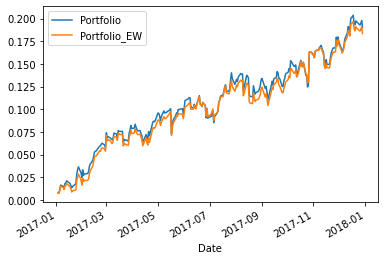

In [51]:
# How many stocks are in your portfolio?
numstocks = 9

# Create an array of equal weights across all assets
portfolio_weights_ew = np.repeat(1/numstocks, numstocks)

# Calculate the equally-weighted portfolio returns
StockReturns['Portfolio_EW'] = StockReturns.iloc[:, 0:numstocks].mul(portfolio_weights_ew, axis=1).sum(axis=1)



cumulative_returns_plot(StockReturns, ['Portfolio', 'Portfolio_EW'])

### Market-cap weighted portfolios
Conversely, when large companies are doing well, market capitalization, or "market cap" weighted portfolios tend to outperform. This is because the largest weights are being assigned to the largest companies, or the companies with the largest market cap.

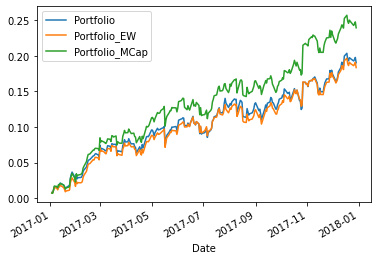

In [52]:
# Create an array of market capitalizations (in billions)
market_capitalizations = np.array([601.51, 469.25, 349.5, 310.48, 299.77, 356.94, 268.88, 331.57, 246.09])

# Calculate the market cap weights
mcap_weights = market_capitalizations / sum(market_capitalizations)

# Calculate the market cap weighted portfolio returns
StockReturns['Portfolio_MCap'] = StockReturns.iloc[:, 0:9].mul(mcap_weights, axis=1).sum(axis=1)
cumulative_returns_plot(StockReturns, ['Portfolio', 'Portfolio_EW', 'Portfolio_MCap'])

**And holy moly that portfolio kills it! Did you know that the S&P 500 Index is market-cap weighted?**

## Correlation and co-variance
### The correlation matrix
The correlation matrix can be used to estimate the linear historical relationship between the returns of multiple assets. You can use the built-in .corr() method on a pandas DataFrame to easily calculate the correlation matrix.

Correlation ranges from -1 to 1. The diagonal of the correlation matrix is always 1, because a stock always has a perfect correlation with itself. The matrix is symmetric, which means that the lower triangle and upper triangle of the matrix are simply reflections of each other since correlation is a bi-directional measurement.

In this exercise, you will use the seaborn library to generate a heatmap.

In [53]:
# Calculate the correlation matrix
correlation_matrix = StockReturns.loc[:,StockReturns.columns.to_list()[:-3]].corr()

# Print the correlation matrix
print(correlation_matrix)

          AAPL      MSFT       XOM       JNJ       JPM      AMZN        GE  \
AAPL  1.000000  0.437430  0.055505  0.038432  0.199914  0.509472  0.006766   
MSFT  0.437430  1.000000  0.084108  0.230215  0.191248  0.621096 -0.044827   
XOM   0.055505  0.084108  1.000000  0.121012  0.305926  0.015118  0.193861   
JNJ   0.038432  0.230215  0.121012  1.000000  0.070328  0.052781  0.067930   
JPM   0.199914  0.191248  0.305926  0.070328  1.000000  0.013919  0.257401   
AMZN  0.509472  0.621096  0.015118  0.052781  0.013919  1.000000 -0.092188   
GE    0.006766 -0.044827  0.193861  0.067930  0.257401 -0.092188  1.000000   
FB    0.542367  0.543341 -0.046813  0.079391  0.095245  0.653030 -0.024364   
T     0.005082 -0.021079  0.197576  0.091622  0.252832 -0.017909  0.292706   

            FB         T  
AAPL  0.542367  0.005082  
MSFT  0.543341 -0.021079  
XOM  -0.046813  0.197576  
JNJ   0.079391  0.091622  
JPM   0.095245  0.252832  
AMZN  0.653030 -0.017909  
GE   -0.024364  0.292706  
FB 

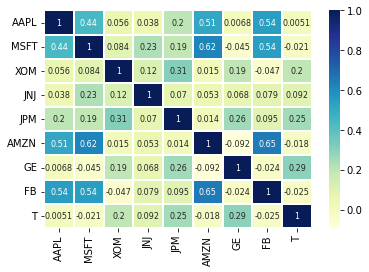

In [54]:
# Import seaborn as sns
import seaborn as sns

# Create a heatmap
sns.heatmap(correlation_matrix,
            annot=True,
            cmap="YlGnBu", 
            linewidths=0.3,
            annot_kws={"size": 8})

# Plot aesthetics
plt.xticks(rotation=90)
plt.yticks(rotation=0) 
plt.show()

**Note that Amazon is most correlated with Facebook and Microsoft. The correlation matrix is very useful for a variety of quantitative investment analysis methods.**

### The co-variance matrix
You can easily compute the co-variance matrix of a DataFrame of returns using the .cov() method.

The correlation matrix doesn't really tell you anything about the variance of the underlying assets, only the linear relationships between assets. The co-variance (a.k.a. variance-covariance) matrix, on the other hand, contains all of this information, and is very useful for portfolio optimization and risk management purposes.

In [55]:
# Calculate the covariance matrix
cov_mat = StockReturns.loc[:,StockReturns.columns.to_list()[:-3]].cov()

# Annualize the co-variance matrix
cov_mat_annual = cov_mat*252

# Print the annualized co-variance matrix
print(cov_mat_annual)

          AAPL      MSFT       XOM       JNJ       JPM      AMZN        GE  \
AAPL  0.030996  0.011400  0.001093  0.000774  0.005716  0.018805  0.000236   
MSFT  0.011400  0.021912  0.001392  0.003899  0.004597  0.019275 -0.001315   
XOM   0.001093  0.001392  0.012500  0.001548  0.005554  0.000354  0.004295   
JNJ   0.000774  0.003899  0.001548  0.013092  0.001307  0.001266  0.001540   
JPM   0.005716  0.004597  0.005554  0.001307  0.026371  0.000474  0.008283   
AMZN  0.018805  0.019275  0.000354  0.001266  0.000474  0.043954 -0.003830   
GE    0.000236 -0.001315  0.004295  0.001540  0.008283 -0.003830  0.039270   
FB    0.016243  0.013682 -0.000890  0.001545  0.002631  0.023290 -0.000821   
T     0.000152 -0.000530  0.003751  0.001780  0.006972 -0.000638  0.009849   

            FB         T  
AAPL  0.016243  0.000152  
MSFT  0.013682 -0.000530  
XOM  -0.000890  0.003751  
JNJ   0.001545  0.001780  
JPM   0.002631  0.006972  
AMZN  0.023290 -0.000638  
GE   -0.000821  0.009849  
FB 

**Since variance is the square of volatility, you didn't have to multiply by the square root of 252.**

### Portfolio standard deviation
In order to calculate portfolio volatility, you will need the covariance matrix, the portfolio weights, and knowledge of the transpose operation. The transpose of a numpy array can be calculated using the .T attribute. The np.dot() function is the dot-product of two arrays.

In [56]:
# Import numpy as np
import numpy as np

# Calculate the portfolio standard deviation
portfolio_volatility = np.sqrt(np.dot(portfolio_weights.T, np.dot(cov_mat_annual, portfolio_weights)))
print(portfolio_volatility)

0.08931417642713793


**This was a monster. The portfolio volatility is 8.93%**


## Markowitz portfolios
### Sharpe ratios
The Sharpe ratio is a simple metric of risk adjusted return which was pioneered by William F. Sharpe. Sharpe ratio is useful to determine how much risk is being taken to achieve a certain level of return. In finance, you are always seeking ways to improve your Sharpe ratio, and the measure is very commonly quoted and used to compare investment strategies.

In [57]:
# Risk free rate
risk_free = 0
RandomPortfolios = pd.read_csv('https://assets.datacamp.com/production/repositories/1546/datasets/85e2663a50d3445cbc2c2d30ac81abbaae6a7f56/EfficientFrontierPortfoliosSlim.csv')
RandomPortfolios

,AAPL weight,MSFT weight,XOM weight,JNJ weight,JPM weight,AMZN weight,GE weight,FB weight,T weight,Returns,Volatility
0,0.000053,0.263110,0.007022,0.040087,0.000027,0.024316,0.355899,0.299400,0.010087,0.127453,0.171565
1,0.042360,0.034922,0.079355,0.043057,0.001435,0.202032,0.225924,0.362324,0.008590,0.138614,0.182723
2,0.207824,0.002132,0.005982,0.041657,0.007498,0.406642,0.064929,0.229260,0.034075,0.155952,0.201185
3,0.096565,0.016775,0.118409,0.037725,0.020013,0.045195,0.512282,0.153015,0.000020,0.118787,0.148958
4,0.131309,0.002733,0.002360,0.047573,0.050633,0.289410,0.313717,0.157123,0.005141,0.138304,0.171473
5,0.030217,0.004305,0.107714,0.029107,0.029903,0.188373,0.269350,0.332927,0.008105,0.142316,0.175777
6,0.007655,0.169038,0.023114,0.032340,0.004398,0.085970,0.263038,0.360287,0.054160,0.142178,0.175248
7,0.169201,0.209762,0.012899,0.021552,0.005978,0.319981,0.227702,0.025310,0.007615,0.143907,0.176766
8,0.268996,0.053900,0.002833,0.025432,0.008408,0.322627,0.148876,0.139105,0.029822,0.149417,0.182563
9,0.021353,0.069281,0.014999,0.036764,0.059347,0.134356,0.309673,0.332525,0.021702,0.142921,0.174062


In [58]:
# Calculate the Sharpe Ratio for each asset
RandomPortfolios['Sharpe'] = (RandomPortfolios['Returns'] - risk_free) / RandomPortfolios['Volatility']

# Print the range of Sharpe ratios
print(RandomPortfolios['Sharpe'].describe()[['min', 'max']])

min    0.742884
max    2.270462
Name: Sharpe, dtype: float64


**Bill Sharpe would be proud! The portfolio historical Sharpe ratios range from 0.742 to 2.27.**

### The MSR portfolio
The maximum Sharpe ratio, or MSR portfolio, which lies at the apex of the efficient frontier, can be constructed by looking for the portfolio with the highest Sharpe ratio.

Unfortunately, the MSR portfolio is often quite erratic. Even though the portfolio had a high historical Sharpe ratio, it doesn't guarantee that the portfolio will have a good Sharpe ratio moving forward.

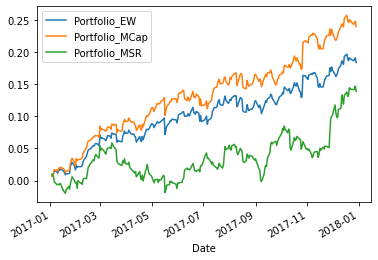

In [59]:
# Sort the portfolios by Sharpe ratio
sorted_portfolios = RandomPortfolios.sort_values(by=['Sharpe'], ascending=False)

# Extract the corresponding weights
MSR_weights = sorted_portfolios.iloc[0, 0:numstocks]

# Cast the MSR weights as a numpy array
MSR_weights_array = np.array(MSR_weights)

# Calculate the MSR portfolio returns
StockReturns['Portfolio_MSR'] = StockReturns.iloc[:, 0:numstocks].mul(MSR_weights_array, axis=1).sum(axis=1)

# Plot the cumulative returns
cumulative_returns_plot(StockReturns, ['Portfolio_EW', 'Portfolio_MCap', 'Portfolio_MSR'])

**You just optimized your first portfolio - but past performance does not guarantee future results. Returns are harder to predict, making the MSR unstable.**

### The GMV portfolio
The global minimum volatility portfolio, or GMV portfolio, is the portfolio with the lowest standard deviation (risk) and the highest return for the given risk level.

Returns are very hard to predict, but volatilities and correlations tend to be more stable over time. This means that the GMV portfolio often outperforms the MSR portfolios out of sample even though the MSR would outperform quite significantly in-sample. Of course, out of sample results are what really matters in finance.

In [60]:
# Sort the portfolios by volatility
sorted_portfolios = RandomPortfolios.sort_values(by=['Volatility'], ascending=True)

# Extract the corresponding weights
GMV_weights = sorted_portfolios.iloc[0,0:numstocks]

# Cast the GMV weights as a numpy array
GMV_weights_array = np.array(GMV_weights)

# Calculate the GMV portfolio returns
StockReturns['Portfolio_GMV'] = StockReturns.iloc[:, 0:numstocks].mul(GMV_weights_array, axis=1).sum(axis=1)

StockReturns

,AAPL,MSFT,XOM,JNJ,JPM,AMZN,GE,FB,T,Portfolio,Portfolio_EW,Portfolio_MCap,Portfolio_MSR,Portfolio_GMV
Date,,,,,,,,,,,,,,
2017-01-03,0.002849,0.007081,0.006980,0.005468,0.010894,0.005068,0.002848,0.015732,0.011521,0.008082,0.007605,0.007132,0.009990,0.007665
2017-01-04,-0.001119,-0.004474,-0.011002,-0.001640,0.001844,0.004657,0.000316,0.015660,-0.005811,0.000161,-0.000174,-0.000329,-0.001690,-0.002782
2017-01-05,0.005085,0.000000,-0.014907,0.010463,-0.009205,0.030732,-0.005678,0.016682,-0.002806,0.003448,0.003374,0.003903,-0.002261,0.003048
2017-01-06,0.011148,0.008668,-0.000565,-0.004792,0.000116,0.019912,0.002855,0.022707,-0.019924,0.004660,0.004458,0.006068,-0.007771,-0.006411
2017-01-09,0.009159,-0.003183,-0.016497,-0.000172,0.000697,0.001168,-0.004745,0.012074,-0.012585,-0.001372,-0.001565,-0.000478,-0.004642,-0.004633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22,0.000000,0.000117,0.001431,-0.006664,-0.003524,-0.005448,0.001717,-0.001409,0.001543,-0.000825,-0.001360,-0.001280,-0.001940,-0.001848
2017-12-26,-0.025370,-0.001286,0.000119,-0.000214,-0.004002,0.007190,0.002877,-0.006828,0.003082,-0.003026,-0.002715,-0.004717,-0.000478,-0.000967
2017-12-27,0.000176,0.003630,-0.000953,0.003426,0.001869,0.004674,-0.002869,0.009262,-0.004352,0.001581,0.001651,0.001854,-0.000242,-0.000180


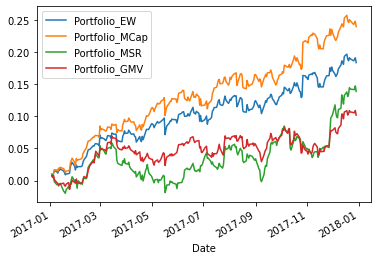

In [61]:
# Plot the cumulative returns
cumulative_returns_plot(StockReturns, ['Portfolio_EW', 'Portfolio_MCap', 'Portfolio_MSR', 'Portfolio_GMV'])

**The GMV portfolio tends to be the most stable optimization over time, but of course you can expect a lower volatility portfolio to have lower return than the benchmark market cap weighting method.**